<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [1]:
import re
import string
from collections import Counter
import squarify
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy
from spacy.tokenizer import Tokenizer

from bs4 import BeautifulSoup
import html as ihtml

## 1) *Optional:* Scrape 100 Job Listings that contain the title "Data Scientist" from indeed.com

At a minimum your final dataframe of job listings should contain
- Job Title
- Job Description

If you choose to not to scrape the data, there is a CSV with outdated data in the directory. Remeber, if you scrape Indeed, you're helping yourself find a job. ;)

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/JimKing100/DS-Unit-4-Sprint-1-NLP/master/module2-vector-representations/data/job_listings.csv',
                 index_col=0)

In [3]:
df.head()

,description,title
0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [4]:
df['description'][0]

'b"<div><div>Job Requirements:</div><ul><li><p>\\nConceptual understanding in Machine Learning models like Nai\\xc2\\xa8ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them</p>\\n</li><li><p>Intermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role)</p>\\n</li><li><p>Exposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R</p>\\n</li><li><p>Ability to communicate Model findings to both Technical and Non-Technical stake holders</p>\\n</li><li><p>Hands on experience in SQL/Hive or similar programming language</p>\\n</li><li><p>Must show past work via GitHub, Kaggle or any other published article</p>\\n</li><li><p>Master\'s degree in Statistics/Mathematics/Computer Science or any other quant specific field.</p></li></ul><div><div><div><div><div><d

In [5]:
def clean_text(text):
    text = text[1:]                               # remove first char 'b'
    text = text.replace('\\n', ' ')               # remove newline
    text = BeautifulSoup(text, "lxml").get_text() # remove html
    text = text.replace('/', ' ')                 # remove forward slashes
    text = re.sub(r'[^a-zA-Z ^0-9]', '', text)    # letters and numbers only
    text = text.lower()                           # lower case
    text = re.sub(r'(x.[0-9])', '', text)         # remove special characters
    return text

for i in range (0, len(df)):
    df['description'][i] = clean_text(df['description'][i])

In [6]:
df['description'][0]

'job requirements conceptual understanding in machine learning models like naive bayes kmeans svm apriori linear  logistic regression neural random forests decision trees knn along with handson experience in at least 2 of them intermediate to expert level coding skills in python r ability to write functions clean and efficient data manipulation are mandatory for this role exposure to packages like numpy scipy pandas matplotlib etc in python or ggplot2 dplyr tidyr in r ability to communicate model findings to both technical and nontechnical stake holders hands on experience in sql hive or similar programming language must show past work via github kaggle or any other published article masters degree in statistics mathematics computer science or any other quant specific field apply now'

In [7]:
df.head()

,description,title
0,job requirements conceptual understanding in m...,Data scientist
1,job description as a data scientist 1 you wil...,Data Scientist I
2,as a data scientist you will be working on con...,Data Scientist - Entry Level
3,4969 6756 a monthcontractunder the general su...,Data Scientist
4,location usa multiple locations 2 years of an...,Data Scientist


In [8]:
df['description'][0]

'job requirements conceptual understanding in machine learning models like naive bayes kmeans svm apriori linear  logistic regression neural random forests decision trees knn along with handson experience in at least 2 of them intermediate to expert level coding skills in python r ability to write functions clean and efficient data manipulation are mandatory for this role exposure to packages like numpy scipy pandas matplotlib etc in python or ggplot2 dplyr tidyr in r ability to communicate model findings to both technical and nontechnical stake holders hands on experience in sql hive or similar programming language must show past work via github kaggle or any other published article masters degree in statistics mathematics computer science or any other quant specific field apply now'

## 2) Use Spacy to tokenize / clean the listings 

In [9]:
nlp = spacy.load("en_core_web_lg")

tokenizer = Tokenizer(nlp.vocab)

In [10]:
STOP_WORDS = nlp.Defaults.stop_words.union(['datum', 'year', 'apply', 'understand', 'work',
                                            'opportunity', 'new', 'use', 'ability', 'company',
                                            'include'])

In [11]:
# Tokenizer pipe removing stop words and blank words and lemmatizing
tokens = []

for doc in tokenizer.pipe(df['description']):
    
    doc_tokens = []
    for token in doc:
        if (token.lemma_ not in STOP_WORDS) & (token.text != ' '):
            doc_tokens.append(token.lemma_)

    tokens.append(doc_tokens)

df['tokens'] = tokens
df['tokens'].head()

0    [job, requirement, conceptual, machine, learn,...
1    [job, description, scientist, 1, help, build, ...
2    [scientist, consult, business, responsible, an...
3    [4969, 6756, monthcontractunder, general, supe...
4    [location, usa, multiple, location, 2, analyti...
Name: tokens, dtype: object

In [12]:
# Create a count function
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')


In [13]:
# Create a word count dataframe
wc = count(df['tokens'])
wc.head(10)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
28,experience,410,1999,1.0,0.016486,0.016486,0.962441
277,team,370,1363,2.0,0.011240,0.027726,0.868545
203,business,324,1251,3.0,0.010317,0.038043,0.760563
72,model,330,1248,4.0,0.010292,0.048335,0.774648
10,learn,343,1065,5.0,0.008783,0.057118,0.805164
39,science,338,978,6.0,0.008065,0.065183,0.793427
236,product,275,892,7.0,0.007356,0.072540,0.645540
171,analysis,317,812,8.0,0.006696,0.079236,0.744131
300,analytics,249,732,9.0,0.006037,0.085273,0.584507
211,build,295,721,10.0,0.005946,0.091219,0.692488


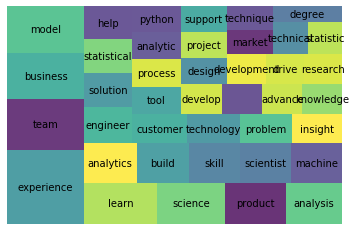

In [14]:
# Graph the word count
wc_top20 = wc[wc['rank'] <= 40]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [15]:
# Function to use spacy tokenizer
def tokenize(document):    
    doc = nlp(document)   
    return [token.lemma_.strip() for token in doc if (token.is_stop != True) and 
                                                     (token.is_punct != True) and
                                                     (token.text != ' ')]

In [16]:
from sklearn.feature_extraction import text 

# create the transformer (instantiate)
vect = CountVectorizer(tokenizer=tokenize, stop_words=STOP_WORDS)

# tokenize and build vocab (fit)
vect.fit(df['description'])

# transform text (transform)
dtm = vect.transform(df['description'])

# Get Word Counts for each document
dtm_wc = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())
dtm_wc.head()

/Users/JKMacBook/opt/anaconda3/envs/nlp-1/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['d', 'm', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


,,-PRON-,0,00,02,02115,03,030,030547069,04,...,zf,zfs,zheng,zillow,zogsport,zone,zoom,zuckerberg,zurich,zurichs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4) Visualize the most common word counts

In [17]:
sum_words = dtm.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vect.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
words_freq[:10] 

[('experience', 1936),
 ('team', 1363),
 ('business', 1251),
 ('science', 978),
 ('product', 892),
 ('model', 866),
 ('data', 843),
 ('analytic', 837),
 ('analysis', 811),
 ('skill', 720)]

In [18]:
cv_top20 = pd.DataFrame(words_freq[:20]) 
cv_top20.head()

,0,1
0,experience,1936
1,team,1363
2,business,1251
3,science,978
4,product,892


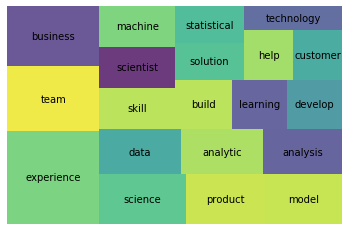

In [19]:
squarify.plot(sizes=cv_top20[1], label=cv_top20[0], alpha=.8 )
plt.axis('off')
plt.show()

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [20]:
# create the transformer (instantiate)
tfidf = TfidfVectorizer(tokenizer=tokenize, stop_words=STOP_WORDS)

# tokenize and build vocab (fit)
tfidf.fit(df['description'])

# transform text (transform)
dtm = tfidf.transform(df['description'])

# Get Word Counts for each document
dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())
dtm.head()

,,-PRON-,0,00,02,02115,03,030,030547069,04,...,zf,zfs,zheng,zillow,zogsport,zone,zoom,zuckerberg,zurich,zurichs
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.110293,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [21]:
# Instantiate
from sklearn.neighbors import NearestNeighbors

# Fit on TF-IDF Vectors
nn = NearestNeighbors(n_neighbors=10, algorithm='ball_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=10, p=2, radius=1.0)

In [22]:
ideal_job = ["""The ideal job would include python, sql, and machine learning in the real estate field"""]

In [23]:
# Query for Sim of Random doc to BBC
new = tfidf.transform(ideal_job)

nn.kneighbors(new.todense())

(array([[1.26849197, 1.31247315, 1.31247315, 1.31742174, 1.31898546,
         1.33336737, 1.34264351, 1.34747481, 1.3476852 , 1.35215874]]),
 array([[127, 344, 197, 408, 244, 200, 283,  31, 237, 276]]))

In [24]:
df['description'][127]

'null associate data scientist  tenx commercial  tenx commercial is the cre marketplace that is a force multiplier for sellers buyers and brokers tenx precisionmatches assets accelerates close rates and streamlines the entire transaction process with more than 55 billion in sales and increasing daily leveraging desktop and mobile technology tenx allows people to safely and easily complete real estate transactions entirely online we bring quality assets to the market and attract prospective investors from around the world by virtue of our bestinclass marketing and scalable technology platform buyers and seller are able to conduct transactions in an efficient manner  tenx empowers consumers investors and real estate professionals with unprecedented levels of flexibility control and simplicity  and the convenience of transacting properties whenever and wherever they want as real estate continues to move online tenx is uniquely positioned at the forefront of this dramatic industry evolutio

In [25]:
df['description'][344]

'reonomy is leveraging the power of data and technology to transform the worlds largest asset class  commercial real estate by structuring the world of property people and company data were able to deliver actionable insights to our customers  headquartered in new york reonomy has raised 70 million from top investors including sapphire ventures bain capital softbank and primary ventures our clients represent the biggest names in cre including newmark knight frank cushman  wakefield tishman speyer and wework  if youre excited by growth innovation and the ability to shape one of the biggest markets join us as our journey is just beginning  about the role  as a data scientist at reonomy you will play a vital role as your models will be critical components embedded in the pipelines that support everything we offer we are creating a bestinclass data infrastructure which intelligently links disparate datasets at scale as well as to manage the complexities of commercial real estate in order t

In [26]:
df['description'][408]

'finlocker is a leading financial data and analytics company we focus on analyzing consumer financial data such as assets income employment taxes credit liabilities real estate and more you will be responsible for designing and implementing the models and analyses for the function of a x9cvirtual financial advisorx9d for the consumer our office is located in clayton mo with remote employees throughout the us  this is a fulltime position that will be based in our clayton st louis office  salary is competitive to relevant experience  key qualifications  6 years experience of applying machine learning techniques optimization and statistics to drive key decisions extensive handson experience with development of predictive models and machine learning aibased solutions solid programming skills in python r or similar data science language advanced proficiency in data visualization prefer financial services industry experience prefer experience in crm financial analysis financial advisory bach

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 

In [27]:
import requests
import time

In [28]:
URL = "https://www.indeed.com/jobs?q=data+scientist+%24120%2C000&l=San+Francisco%2C+CA"
#conducting a request of the stated URL above:
page = requests.get(URL)
#specifying a desired format of “page” using the html parser - this allows python to read the various components of the page, rather than treating it as one long string.
soup = BeautifulSoup(page.text, "html.parser")
#printing soup in a more structured tree format that makes for easier reading
print(soup.prettify())

<!DOCTYPE html>
<html dir="ltr" lang="en">
 <head>
  <meta content="text/html;charset=utf-8" http-equiv="content-type"/>
  <script src="/s/cb2751b/en_US.js" type="text/javascript">
  </script>
  <script>
   window.indeed=window.indeed||{};indeed.crashtext=indeed.crashtext||{};indeed.crashtext.populate=indeed.crashtext.populate||function(c,g){var d=window[g];if(d){var e=d[""]||{},h=e.salt;if(e.hasOwnProperty("salt"))for(var b in c){for(var a=void 0,a=h,f=b.length;f;)a=33*a^b.charCodeAt(--f);a>>>=0;e.hasOwnProperty("id_length")&&(a=String(a).substring(0,e.id_length));d[a]=c[b]}else for(b in c)d[b]=[null].concat(c[b])}};indeed.crashtext.populate({"Save jobs and view them from any computer.":["Save job and remind me to apply."],"You must sign in to save jobs:":["Sign in to save:"]}, 'indeed.i18n.localeData')
  </script>
  <link href="/s/b066150/jobsearch_all.css" rel="stylesheet" type="text/css"/>
  <link href="http://rss.indeed.com/rss?q=data+scientist+%24120%2C000&amp;l=San+Francisco%2C+

In [29]:
def extract_job_title(soup):
    jobs = []
    for div in soup.find_all(name="div", attrs={"class":"row"}):
        for a in div.find_all(name="a", attrs={"data-tn-element":"jobTitle"}):
            jobs.append(a["title"])
    return(jobs)

extract_job_title(soup)

['Machine Learning Engineer',
 'Data Scientist',
 'Data Scientist - Financial Technology Start Up!',
 'Data Scientist - Health Care',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist (Jr. to Sr. Level)',
 'Data Scientist',
 'Geospatial Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Sr Data Scientist',
 'Associate Data Scientist',
 'Sr. Data Scientist',
 'Data Scientist']

In [30]:
def extract_company(soup):
    companies = []
    for div in soup.find_all(name="div", attrs={"class":"row"}):
        company = div.find_all(name="span", attrs={"class":"company"})
        if len(company) > 0:
            for b in company:
                companies.append(b.text.strip())
        else:
            sec_try = div.find_all(name="span", attrs={"class":"result-linl-source"})
            for span in sec_try:
                companies.append(span.text.strip())
    return(companies)

extract_company(soup)

['Triplebyte',
 'Stripe',
 'Jobot',
 'Jobot',
 'University of California San Francisco',
 'Woodruff Sawyer',
 'Unlearn.AI',
 'Piper Companies',
 'Gap Inc.',
 'Spin',
 'Esurance',
 'BUSINESS INTEGRA, INC',
 'Gap Inc.',
 'Woodruff Sawyer',
 'Blue Owl']

In [31]:
def extract_location(soup):
    locations = []
    for div in soup.find_all(name="div", attrs={"class":"row"}):
        try:
            locations.append(div.find(name="span", attrs={"class":"location"}).text)
        except:
            locations.append("None")
    return(locations)

extract_location(soup)

['None',
 'None',
 'None',
 'None',
 'San Francisco, CA 94143 (Inner Sunset area)',
 'San Francisco, CA 94111 (Financial District area)',
 'San Francisco, CA',
 'San Francisco, CA 94107 (South Of Market area)',
 'San Francisco, CA 94105 (Financial District area)',
 'San Francisco Bay Area, CA',
 'San Francisco, CA',
 'San Francisco, CA 94105 (Financial District area)',
 'San Francisco, CA',
 'San Francisco, CA 94105 (Financial District area)',
 'None',
 'None']

In [32]:
def extract_salary(soup):
    salaries = []
    for div in soup.find_all(name="div", attrs={"class":"row"}):
        try:
            salaries.append(div.find(name="span", attrs={"class":"salaryText"}).text.replace("\n",""))
        except:
            salaries.append("None")
    return(salaries)

extract_salary(soup)

['$125,000 - $190,000 a year',
 'None',
 '$120,000 - $160,000 a year',
 '$230,000 - $250,000 a year',
 'None',
 'None',
 'None',
 '$120,000 - $220,000 a year',
 'None',
 'None',
 'None',
 'None',
 '$100,000 - $150,000 a year',
 'None',
 'None',
 '$200,000 - $350,000 a year']

In [33]:
def extract_summary(soup):
    summaries = []
    for div1 in soup.find_all(name="div", attrs={"class":"row"}):
        for div2 in div1.find_all(name="div", attrs={"class":"summary"}):
            for li in div2:
                summaries.append(li)
    return(summaries)

extract_summary(soup)

['\n',
 <ul style="list-style-type:circle;margin-top: 0px;margin-bottom: 0px;padding-left:20px;"> <li style="margin-bottom:0px;">For any company building software, this is crucial for success.</li><li style="margin-bottom:0px;">Fields your work will touch on*.</li><li>We have a novel dataset of candidate profiles and interview…</li></ul>,
 '\n',
 <ul style="list-style-type:circle;margin-top: 0px;margin-bottom: 0px;padding-left:20px;"> <li style="margin-bottom:0px;">Generate insights and impact from data.</li><li>Work closely with product and business teams to identify important questions and answer them with data.</li></ul>,
 '\n',
 <ul style="list-style-type:circle;margin-top: 0px;margin-bottom: 0px;padding-left:20px;"> <li style="margin-bottom:0px;">This Jobot Job is hosted by: Shalimar Auer.</li><li style="margin-bottom:0px;">Salary: $120,000 - $160,000 per year.</li><li>If you are a Data Scientist with a background in MITIGATING RISK, then please.</li></ul>,
 '\n',
 <ul style="list

In [34]:
def extract_job_title(soup):
    jobs = []
    for div in soup.find_all(name="div", attrs={"class":"row"}):
        for a in div.find_all(name="a", attrs={"data-tn-element":"jobTitle"}):
            jobs.append(a["title"])
    return(jobs)

extract_job_title(soup)

['Machine Learning Engineer',
 'Data Scientist',
 'Data Scientist - Financial Technology Start Up!',
 'Data Scientist - Health Care',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist (Jr. to Sr. Level)',
 'Data Scientist',
 'Geospatial Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Sr Data Scientist',
 'Associate Data Scientist',
 'Sr. Data Scientist',
 'Data Scientist']

In [35]:
def extract_url(soup):
    urls = []
    for div1 in soup.find_all(name="div", attrs={"class":"row"}):
        for div2 in div1.find_all(name="div", attrs={"class":"title"}):
            for a in div2.find_all(name="a", href=True):
                urls.append(a['href'])
    return(urls)

def extract_desc(urls):
    descs = []
    for url in urls:
        full_url = "https://www.indeed.com" + url
        detail_page = requests.get(full_url)
        detail_soup = BeautifulSoup(detail_page.text, "html.parser")
        
        for div in detail_soup.find_all(name="div", attrs={"id":"jobDescriptionText"}):
            descs.append(div.text)
    return(descs)

add_urls = extract_url(soup)
detail_data = extract_desc(add_urls)
print(detail_data)

['About TriplebyteTriplebyte helps companies find and hire great technical talent. For any company building software, this is crucial for success. A recent survey of top C-Level Executives, across multiple industries, showed that software, R&D and recruiting technical talent are the top areas they are planning increased investment and budget over the next 5 years. Companies like Apple, Dropbox and American Express trust Triplebyte’s online technical assessment to identify the best engineers for their open roles and reduce the time and effort it takes to hire them.Earlier this year we raised a $35 million Series B and our team of 40 will double in size during 2019. Now is a great time to join as we\'re on an exciting growth trajectory. You will have lots of opportunity for taking on responsibility and developing new skills quickly.We have built Machine Learning models that predict the likelihood of an engineer getting an offer from a particular company. Interviewing and assessing engine

In [36]:
def extract_count(soup):
    for div in soup.find_all(name="div", attrs={"id":"searchCountPages"}):
        temp_str = div.text.replace(" ", "")
        count_str = re.search('of(.*)jobs', temp_str) 
        count = int(count_str.group(1))
    return(count)

extract_count(soup)

393

In [43]:
max_results = 1000
title_name = "data+scientist"
city_name = "San+Francisco"
st_name = "CA"
columns = ["city", "job_title", "company", "location", "salary", "description"]

city_url = "https://www.indeed.com/jobs?q=" + title_name + \
               "&l=" + city_name + "%2C+" + st_name
page = requests.get(city_url)
soup = BeautifulSoup(page.text, "html.parser")
max_counter = extract_count(soup)
counter = 0
print(max_counter)

job_title_list = []
company_list = []
location_list = []
salary_list = []
desc_list = []

for start in range(0, max_results, 10):
    city_url = "https://www.indeed.com/jobs?q=" + title_name + \
               "&l=" + city_name + "%2C+" + st_name + \
               "&start=" + str(start)
    print(city_url)
    page = requests.get(city_url)
    soup = BeautifulSoup(page.text, "html.parser")

    job_title_list.extend(extract_job_title(soup))
    company_list.extend(extract_company(soup))
    location_list.extend(extract_location(soup))
    salary_list.extend(extract_salary(soup))
    add_urls = extract_url(soup)
    desc_list.extend(extract_desc(add_urls))
    
    # counter = len(job_title_list)
    # if counter >= max_counter:
    #     break
    
indeed_df = pd.DataFrame(list(zip(job_title_list, company_list, location_list, 
                                  salary_list, desc_list)), 
                         columns = ['job_title', 'company', 'location', 'salary', 'description'])



935
https://www.indeed.com/jobs?q=data+scientist&l=San+Francisco%2C+CA&start=0
https://www.indeed.com/jobs?q=data+scientist&l=San+Francisco%2C+CA&start=10
https://www.indeed.com/jobs?q=data+scientist&l=San+Francisco%2C+CA&start=20
https://www.indeed.com/jobs?q=data+scientist&l=San+Francisco%2C+CA&start=30
https://www.indeed.com/jobs?q=data+scientist&l=San+Francisco%2C+CA&start=40
https://www.indeed.com/jobs?q=data+scientist&l=San+Francisco%2C+CA&start=50
https://www.indeed.com/jobs?q=data+scientist&l=San+Francisco%2C+CA&start=60
https://www.indeed.com/jobs?q=data+scientist&l=San+Francisco%2C+CA&start=70
https://www.indeed.com/jobs?q=data+scientist&l=San+Francisco%2C+CA&start=80
https://www.indeed.com/jobs?q=data+scientist&l=San+Francisco%2C+CA&start=90
https://www.indeed.com/jobs?q=data+scientist&l=San+Francisco%2C+CA&start=100
https://www.indeed.com/jobs?q=data+scientist&l=San+Francisco%2C+CA&start=110
https://www.indeed.com/jobs?q=data+scientist&l=San+Francisco%2C+CA&start=120
https:

In [44]:
indeed_df

,job_title,company,location,salary,description
0,Machine Learning Engineer,Triplebyte,None,"$125,000 - $190,000 a year",About TriplebyteTriplebyte helps companies fin...
1,Data Analyst/Data Scientist,Quicken Inc.,None,None,Quicken is committed to helping people lead he...
2,Data Scientist,Stripe,None,None,Generate insights and impact from data.\n\nWe'...
3,Sr. Data Scientist,Woodruff Sawyer,None,None,The Commercial Lines BI team at WS is a newly ...
4,Sr. Strategic Data Analyst - Innovation Group,Wells Fargo Bank,None,None,Job Description\n\nImportant Note: During the ...
5,Data Scientist,Affinity,None,None,Affinity is on a mission to help everyone in t...
6,Research Data Scientist,University of California San Francisco,"San Francisco, CA 94143 (Inner Sunset area)",None,The Research Data Scientist will join a collab...
7,Data Scientist,WanderJaunt,"San Francisco, CA",None,Who We Are\n\nWanderJaunt is building the futu...
8,Data Scientist,University of California San Francisco,"San Francisco, CA 94143 (Inner Sunset area)",None,The Data Scientist will work with the Principa...
9,Data Scientist (Jr. to Sr. Level),Piper Companies,"San Francisco, CA 94107 (South Of Market area)","$120,000 - $220,000 a year",Piper Companies is currently looking for Data ...


In [45]:
indeed_df.drop_duplicates(keep=False,inplace=True) 
indeed_df

,job_title,company,location,salary,description
2,Data Scientist,Stripe,None,None,Generate insights and impact from data.\n\nWe'...
3,Sr. Data Scientist,Woodruff Sawyer,None,None,The Commercial Lines BI team at WS is a newly ...
4,Sr. Strategic Data Analyst - Innovation Group,Wells Fargo Bank,None,None,Job Description\n\nImportant Note: During the ...
5,Data Scientist,Affinity,None,None,Affinity is on a mission to help everyone in t...
6,Research Data Scientist,University of California San Francisco,"San Francisco, CA 94143 (Inner Sunset area)",None,The Research Data Scientist will join a collab...
7,Data Scientist,WanderJaunt,"San Francisco, CA",None,Who We Are\n\nWanderJaunt is building the futu...
8,Data Scientist,University of California San Francisco,"San Francisco, CA 94143 (Inner Sunset area)",None,The Data Scientist will work with the Principa...
9,Data Scientist (Jr. to Sr. Level),Piper Companies,"San Francisco, CA 94107 (South Of Market area)","$120,000 - $220,000 a year",Piper Companies is currently looking for Data ...
10,Data Scientist - Marketing Analytics,Splunk,"San Francisco, CA",None,Join us as we pursue our disruptive new vision...
11,Data Scientist,Unlearn.AI,"San Francisco, CA",None,About Unlearn\nClinical trials are risky and c...
